In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log2

In [2]:
import seaborn as sns

Is there a noticeable difference in high/medium/low abundance of transcription expression detection ability for DM and RS? Plot: Heatmaps with log2 of reads and figure out thresholds (Both refine data. Leeza - DM samples, Luc - RS samples)

In [3]:
data=pd.read_csv('rnaSeqTPM.tsv',delimiter='\t')
data.head()

,target,AC-10_L001-ds.a84fdb211ec34671aca066ec644cf980,AC-10_L002-ds.2ddd07759d0049598e038c6f5ba208fa,AC-10_L003-ds.c54fbdfec6c64f5f9b34d857bdc2d39b,AC-10_L004-ds.2bd4291178074656a4052e86fe3a627e,AC-1_L001-ds.4e1b9a9de76b4859a777b1e85ee85940,AC-1_L002-ds.01aba20a131d47c1ab69483d8ec077ec,AC-1_L003-ds.88a026919bd04bc5a4216cb9f1c13b9f,AC-1_L004-ds.7f15d836c940438a91be474a714f4b2c,AC-2_L001-ds.857a9a7bb18646108f52f84bc5b08aaf,...,AC-7_L003-ds.90fc01aaf24b45caa6e05a27f56c79a1,AC-7_L004-ds.422324df17bb4355a209d2e206d4ebc0,AC-8_L001-ds.b12e8f44abb04463b2f39d8752f94941,AC-8_L002-ds.a0c59a8dc0f24e30aec2c8d0a17334ca,AC-8_L003-ds.e77040b8045f45478d3aeef2c419abb9,AC-8_L004-ds.04e2a2a871c145e49fb29ada5cf53c09,AC-9_L001-ds.a46dbd8c24a44ddea892e43e28a4ba93,AC-9_L002-ds.bbb091f5bbca4f889ad07186bc5d1f49,AC-9_L003-ds.194a0d6a4ab447dab95363ede97522f3,AC-9_L004-ds.9eb4326b03f84467a6b399d8f09fd9da
0,14266|CENPU,26.5465,16.2036,15.82680,23.04800,4.27284,4.34290,0.00000,0.0000,49.09530,...,3.85098,0.00000,80.97500,61.55940,50.31760,65.41160,2.26704,2.31271,18.11890,6.95662
1,13331|PEX14,14.7797,30.2357,14.57500,20.07720,25.98820,53.11600,34.81970,35.4412,20.75710,...,23.94680,24.49580,9.05497,13.72040,41.40420,27.30500,18.80870,37.86440,14.20190,14.27680
2,6630|RAD52,10.6624,11.1358,14.51280,11.07570,10.32110,7.00181,6.95342,17.4680,25.68350,...,9.45641,6.51098,3.51170,3.51882,8.84862,3.60949,9.13044,14.82380,7.27973,16.71440
3,16802|CLYBL,14.9415,15.5777,5.08468,6.89438,19.27520,3.27223,6.50129,16.3063,2.67345,...,0.00000,12.25740,16.36970,14.76480,14.85800,6.74993,11.92510,5.18773,8.49613,3.46830
4,6645|RANBP1,120.0090,95.8606,115.83400,81.36820,65.89110,52.77280,55.74450,89.2274,436.34000,...,124.60800,83.27780,142.70700,171.49800,198.41100,171.52600,86.65530,105.10300,47.65850,64.37860


In [4]:
data=data.rename(columns={'AC-10_L001-ds.a84fdb211ec34671aca066ec644cf980':'AC10_1',
       'AC-10_L002-ds.2ddd07759d0049598e038c6f5ba208fa':'AC10_2',
       'AC-10_L003-ds.c54fbdfec6c64f5f9b34d857bdc2d39b':'AC10_3',
       'AC-10_L004-ds.2bd4291178074656a4052e86fe3a627e':'AC10_4',
       'AC-1_L001-ds.4e1b9a9de76b4859a777b1e85ee85940':'AC1_1',
       'AC-1_L002-ds.01aba20a131d47c1ab69483d8ec077ec':'AC1_2',
       'AC-1_L003-ds.88a026919bd04bc5a4216cb9f1c13b9f':'AC1_3',
       'AC-1_L004-ds.7f15d836c940438a91be474a714f4b2c':'AC1_4',
       'AC-2_L001-ds.857a9a7bb18646108f52f84bc5b08aaf':'AC2_1',
       'AC-2_L002-ds.5a9da74220064ee89a9736bc85a52179':'AC2_2',
       'AC-2_L003-ds.e6194500d53a4f33bfc7915c64a5beeb':'AC2_3',
       'AC-2_L004-ds.246b173490c3494a8eeea8621ec361d1':'AC2_4',
       'AC-3_L001-ds.58010ec40df84a978e4af7d1a23d1af9':'AC3_1',
       'AC-3_L002-ds.454403b9d0ac4d72af1220546b5a630d':'AC3_2',
       'AC-3_L003-ds.d83a7a6dd4c545b1b2170c1100cf2120':'AC3_3',
       'AC-3_L004-ds.6cf9ff6076264856a74212cfc7410e96':'AC3_4',
       'AC-4_L001-ds.e45254993f044e7da3deb87a28e560a4':'AC4_1',
       'AC-4_L002-ds.fcf9658251c14b40b7ed788a6f9d1adb':'AC4_2',
       'AC-4_L003-ds.109477542e734e6c8c93bedd405a3039':'AC4_3',
       'AC-4_L004-ds.d101269468414b71a926cd9fc76cb004':'AC4_4',
       'AC-5_L001-ds.bd13708d4f784119ac0a2ae972e37f66':'AC5_1',
       'AC-5_L002-ds.ffd221b8bc164be3b6d604985219be02':'AC5_2',
       'AC-5_L003-ds.8d1b59e10e7b4ae7bd089b99744e3802':'AC5_3',
       'AC-5_L004-ds.9b5362075da148408cb715587ce595a5':'AC5_4',
       'AC-6_L001-ds.3ab380d9704849cda96aed57e96e6586':'AC6_1',
       'AC-6_L002-ds.6d19015742374d079236d90ae72f1d2a':'AC6_2',
       'AC-6_L003-ds.f4a789852ddb477bad1ab00670699315':'AC6_3',
       'AC-6_L004-ds.a5e6028617944efd9b68ef878d9df54e':'AC6_4',
       'AC-7_L001-ds.fc6c5f45845543248f39571f54a4fa7b':'AC7_1',
       'AC-7_L002-ds.9da13968f23c45489f6bcee732149847':'AC7_2',
       'AC-7_L003-ds.90fc01aaf24b45caa6e05a27f56c79a1':'AC7_3',
       'AC-7_L004-ds.422324df17bb4355a209d2e206d4ebc0':'AC7_4',
       'AC-8_L001-ds.b12e8f44abb04463b2f39d8752f94941':'AC8_1',
       'AC-8_L002-ds.a0c59a8dc0f24e30aec2c8d0a17334ca':'AC8_2',
       'AC-8_L003-ds.e77040b8045f45478d3aeef2c419abb9':'AC8_3',
       'AC-8_L004-ds.04e2a2a871c145e49fb29ada5cf53c09':'AC8_4',
       'AC-9_L001-ds.a46dbd8c24a44ddea892e43e28a4ba93':'AC9_1',
       'AC-9_L002-ds.bbb091f5bbca4f889ad07186bc5d1f49':'AC9_2',
       'AC-9_L003-ds.194a0d6a4ab447dab95363ede97522f3':'AC9_3',
       'AC-9_L004-ds.9eb4326b03f84467a6b399d8f09fd9da':'AC9_4'})
data.head()

,target,AC10_1,AC10_2,AC10_3,AC10_4,AC1_1,AC1_2,AC1_3,AC1_4,AC2_1,...,AC7_3,AC7_4,AC8_1,AC8_2,AC8_3,AC8_4,AC9_1,AC9_2,AC9_3,AC9_4
0,14266|CENPU,26.5465,16.2036,15.82680,23.04800,4.27284,4.34290,0.00000,0.0000,49.09530,...,3.85098,0.00000,80.97500,61.55940,50.31760,65.41160,2.26704,2.31271,18.11890,6.95662
1,13331|PEX14,14.7797,30.2357,14.57500,20.07720,25.98820,53.11600,34.81970,35.4412,20.75710,...,23.94680,24.49580,9.05497,13.72040,41.40420,27.30500,18.80870,37.86440,14.20190,14.27680
2,6630|RAD52,10.6624,11.1358,14.51280,11.07570,10.32110,7.00181,6.95342,17.4680,25.68350,...,9.45641,6.51098,3.51170,3.51882,8.84862,3.60949,9.13044,14.82380,7.27973,16.71440
3,16802|CLYBL,14.9415,15.5777,5.08468,6.89438,19.27520,3.27223,6.50129,16.3063,2.67345,...,0.00000,12.25740,16.36970,14.76480,14.85800,6.74993,11.92510,5.18773,8.49613,3.46830
4,6645|RANBP1,120.0090,95.8606,115.83400,81.36820,65.89110,52.77280,55.74450,89.2274,436.34000,...,124.60800,83.27780,142.70700,171.49800,198.41100,171.52600,86.65530,105.10300,47.65850,64.37860


In [31]:
n=1
m=5
p=1
for _ in range(10):
    
    data[f'AC{p}']=data.iloc[:,n:m].sum(axis=1)
    p=p+1
    n=n+4
    m=m+4

data=data.rename(columns={'AC1':'AC10','AC2':'AC1','AC3':'AC2','AC4':'AC3','AC5':'AC4','AC6':'AC5','AC7':'AC6','AC8':'AC7',
                     'AC9':'AC8','AC10':'AC9'})
data.head()

,target,AC10_1,AC10_2,AC10_3,AC10_4,AC1_1,AC1_2,AC1_3,AC1_4,AC2_1,...,AC9,AC10,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8
0,14266|CENPU,26.5465,16.2036,15.82680,23.04800,4.27284,4.34290,0.00000,0.0000,49.09530,...,29.65527,81.62490,8.61574,170.97430,206.33410,74.49033,14.01920,232.81520,7.75205,258.26360
1,13331|PEX14,14.7797,30.2357,14.57500,20.07720,25.98820,53.11600,34.81970,35.4412,20.75710,...,85.15180,79.66760,149.36510,63.38079,63.76829,204.83610,70.89664,95.62320,81.03360,91.48457
2,6630|RAD52,10.6624,11.1358,14.51280,11.07570,10.32110,7.00181,6.95342,17.4680,25.68350,...,47.94837,47.38670,41.74433,86.76690,53.01190,28.29175,20.28294,30.44116,44.69559,19.48863
3,16802|CLYBL,14.9415,15.5777,5.08468,6.89438,19.27520,3.27223,6.50129,16.3063,2.67345,...,29.07726,42.49826,45.35502,35.28993,19.00245,82.47150,107.09330,36.08711,18.26351,52.74243
4,6645|RANBP1,120.0090,95.8606,115.83400,81.36820,65.89110,52.77280,55.74450,89.2274,436.34000,...,303.79540,413.07180,263.63580,1385.86100,904.30800,509.10360,192.12760,411.85970,356.74200,684.14200


In [32]:
data_m=data[['target','AC1','AC2','AC3','AC4','AC5','AC6','AC7','AC8','AC9','AC10']]
data_m.head()

,target,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,AC10
0,14266|CENPU,8.61574,170.97430,206.33410,74.49033,14.01920,232.81520,7.75205,258.26360,29.65527,81.62490
1,13331|PEX14,149.36510,63.38079,63.76829,204.83610,70.89664,95.62320,81.03360,91.48457,85.15180,79.66760
2,6630|RAD52,41.74433,86.76690,53.01190,28.29175,20.28294,30.44116,44.69559,19.48863,47.94837,47.38670
3,16802|CLYBL,45.35502,35.28993,19.00245,82.47150,107.09330,36.08711,18.26351,52.74243,29.07726,42.49826
4,6645|RANBP1,263.63580,1385.86100,904.30800,509.10360,192.12760,411.85970,356.74200,684.14200,303.79540,413.07180


In [33]:
data_count=data_m['target'].count()
data_m=data_m.set_index('target')

In [34]:
def log_df(df):
    columns_list=df.columns
    for column in columns_list:
        col_name=column+'_log'
        col_numbers=list(df[column])
        log_numbers=[]
        for num in col_numbers:
            if num>1:
                log_numbers.append(log2(num))
            else:
                log_numbers.append(0)
        df[col_name]=log_numbers

In [35]:
data_m2=data_m
log_df(data_m2)
data_m2.head()

,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,AC10,AC1_log,AC2_log,AC3_log,AC4_log,AC5_log,AC6_log,AC7_log,AC8_log,AC9_log,AC10_log
target,,,,,,,,,,,,,,,,,,,,
14266|CENPU,8.61574,170.97430,206.33410,74.49033,14.01920,232.81520,7.75205,258.26360,29.65527,81.62490,3.106975,7.417636,7.688838,6.218981,3.809332,7.863041,2.954578,8.012701,4.890217,6.350937
13331|PEX14,149.36510,63.38079,63.76829,204.83610,70.89664,95.62320,81.03360,91.48457,85.15180,79.66760,7.222699,5.985974,5.994767,7.678326,6.147645,6.579289,6.340448,6.515457,6.411965,6.315921
6630|RAD52,41.74433,86.76690,53.01190,28.29175,20.28294,30.44116,44.69559,19.48863,47.94837,47.38670,5.383508,6.439073,5.728244,4.822310,4.342195,4.927951,5.482061,4.284561,5.583410,5.566410
16802|CLYBL,45.35502,35.28993,19.00245,82.47150,107.09330,36.08711,18.26351,52.74243,29.07726,42.49826,5.503190,5.141185,4.248114,6.365824,6.742724,5.173412,4.190892,5.720892,4.861819,5.409332
6645|RANBP1,263.63580,1385.86100,904.30800,509.10360,192.12760,411.85970,356.74200,684.14200,303.79540,413.07180,8.042402,10.436567,9.820670,8.991815,7.585921,8.686009,8.478737,9.418152,8.246956,8.690249


In [36]:
data_log=data_m2.iloc[:,10:20]
data_log.head()

,AC1_log,AC2_log,AC3_log,AC4_log,AC5_log,AC6_log,AC7_log,AC8_log,AC9_log,AC10_log
target,,,,,,,,,,
14266|CENPU,3.106975,7.417636,7.688838,6.218981,3.809332,7.863041,2.954578,8.012701,4.890217,6.350937
13331|PEX14,7.222699,5.985974,5.994767,7.678326,6.147645,6.579289,6.340448,6.515457,6.411965,6.315921
6630|RAD52,5.383508,6.439073,5.728244,4.822310,4.342195,4.927951,5.482061,4.284561,5.583410,5.566410
16802|CLYBL,5.503190,5.141185,4.248114,6.365824,6.742724,5.173412,4.190892,5.720892,4.861819,5.409332
6645|RANBP1,8.042402,10.436567,9.820670,8.991815,7.585921,8.686009,8.478737,9.418152,8.246956,8.690249


In [38]:
tab=data_log.transpose()
tab.head()

target,14266|CENPU,13331|PEX14,6630|RAD52,16802|CLYBL,6645|RANBP1,12149|KDF1,11733|TBC1D30,14535|TMEM258,12400|LRG1,11931|HYAL1,...,16176|GAB3,13299|ZNF701,5706|NEB,15110|ZNF775,3181|CCNB2,16735|BBS12,14784|ANKRD27,3464|COL19A1,10238|TCTA,10545|CA5A
AC1_log,3.106975,7.222699,5.383508,5.503190,8.042402,4.245839,7.061035,8.693610,0.000000,6.054180,...,1.350673,4.075561,2.337782,7.139967,0.000000,4.449345,6.636225,5.332654,6.913491,0.000000
AC2_log,7.417636,5.985974,6.439073,5.141185,10.436567,4.963911,4.822148,10.210013,6.251886,5.756653,...,2.685171,3.289013,2.064607,5.983449,8.592308,1.746446,6.254808,0.000000,5.761934,0.000000
AC3_log,7.688838,5.994767,5.728244,4.248114,9.820670,6.729278,5.648200,9.627450,5.118327,2.785576,...,0.000000,4.836249,3.458984,5.313137,8.048997,2.793720,7.592719,0.000000,6.562096,0.000000
AC4_log,6.218981,7.678326,4.822310,6.365824,8.991815,3.497970,5.318626,8.803169,5.478247,7.185426,...,4.567949,3.039789,3.540372,6.355929,6.513309,4.231803,7.537454,2.849012,6.562743,0.000000
AC5_log,3.809332,6.147645,4.342195,6.742724,7.585921,3.712148,2.695954,8.224163,9.465277,8.353782,...,1.756216,4.461696,1.699800,3.378955,3.755232,2.178158,5.819152,0.000000,6.572714,6.058026


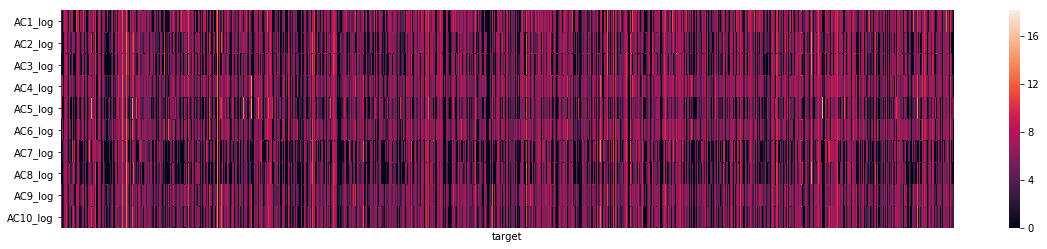

In [40]:
plt.figure(figsize=(20,4))
sns.heatmap(tab,xticklabels=False,yticklabels=True,)

Text(0.5, 1.0, 'Example scatter ')

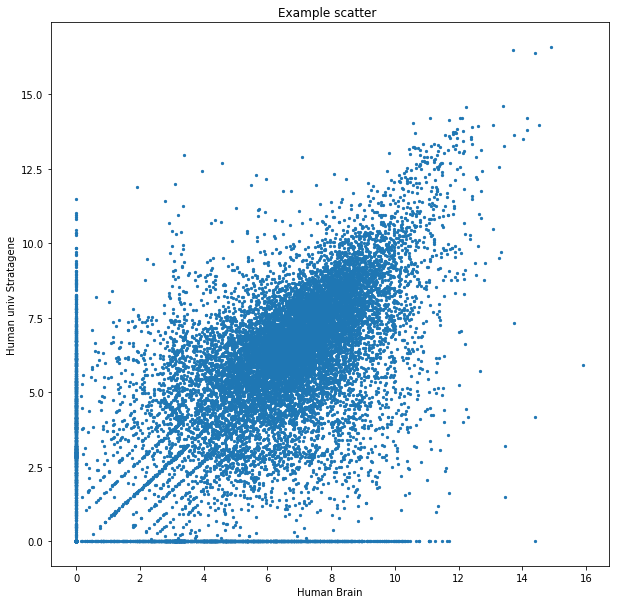

In [49]:
# This should be changed so y axis is same set of RNA (human, univ, etc) but from DM
plt.figure(figsize=(10,10))
plt.scatter(x=data_log['AC1_log'],y=data_log['AC2_log'],s=5)
plt.xlabel('Human Brain')
plt.ylabel('Human univ Stratagene')
plt.title('Example scatter ')


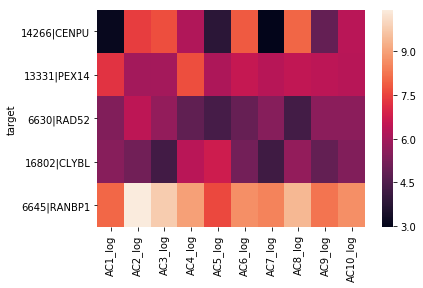

In [45]:
# Just smaller sample, to see how heatmaps looks for just 5 genes
df2=data_log.head()
sns.heatmap(df2) 